# 🌍 Global GDP Growth Analysis (2020–2025): Insights & Visualizations

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv(r'C:\Users\AMAR\Downloads\2020-2025.csv')
df.head(10)

,Country,2020,2021,2022,2023,2024,2025
0,Afghanistan,20136,14278.0,14501.0,17248.0,NaN,NaN
1,Albania,15271,18086.0,19185.0,23388.0,27259.0,28372.0
2,Algeria,164774,185850.0,225709.0,247789.0,264913.0,268885.0
3,Andorra,2885,3325.0,3376.0,3786.0,4038.0,4035.0
4,Angola,66521,84375.0,142442.0,109764.0,115946.0,113343.0
5,Antigua and Barbuda,1412,1602.0,1867.0,2006.0,2225.0,2373.0
6,Argentina,385218,486040.0,632318.0,645511.0,632145.0,683533.0
7,Armenia,12642,13879.0,19514.0,24086.0,25533.0,26258.0
8,Aruba,2486,2929.0,3279.0,3649.0,3952.0,4100.0
9,Australia,1362613,1655843.0,1725461.0,1742461.0,1796805.0,1771681.0


In [3]:
df.isnull().sum()

Country    0
2020       0
2021       2
2022       2
2023       2
2024       4
2025       7
dtype: int64

In [40]:
df['2021'] = df['2021'].fillna(df['2021'].median())
df['2022'] = df['2022'].fillna(df['2022'].median())
df['2023'] = df['2023'].fillna(df['2023'].median())
df['2024'] = df['2024'].fillna(df['2024'].median())
df['2025'] = df['2025'].fillna(df['2025'].median())
df


,Country,2020,2021,2022,2023,2024,2025,Region,Growth_2020_2025,CAGR,Absolute_Growth,Trend,Avg_GDP,Max_GDP_Year,Min_GDP_Year,GDP_Category
0,Afghanistan,20136,14278.0,14278.0,14278.0,14278.0,14278.0,Asia,-29.09,-6.64,-5858.0,Declining,15254.33,2020,2021,Low
1,Albania,15271,18086.0,18086.0,18086.0,18086.0,18086.0,Europe,18.43,3.44,2815.0,Growing,17616.83,2021,2020,Low
2,Algeria,164774,185850.0,185850.0,185850.0,185850.0,185850.0,Africa,12.79,2.44,21076.0,Growing,182337.33,2021,2020,Medium
3,Andorra,2885,3325.0,3325.0,3325.0,3325.0,3325.0,Europe,15.25,2.88,440.0,Growing,3251.67,2021,2020,Low
4,Angola,66521,84375.0,84375.0,84375.0,84375.0,84375.0,Africa,26.84,4.87,17854.0,Growing,81399.33,2021,2020,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,Vietnam,346310,370076.0,370076.0,370076.0,370076.0,370076.0,Asia,6.86,1.34,23766.0,Growing,366115.00,2021,2020,High
192,Palestine,15532,18109.0,18109.0,18109.0,18109.0,18109.0,Asia,16.59,3.12,2577.0,Growing,17679.50,2021,2020,Low
193,Yemen,20220,19394.0,19394.0,19394.0,19394.0,19394.0,Asia,-4.09,-0.83,-826.0,Declining,19531.67,2020,2021,Low
194,Zambia,18138,22096.0,22096.0,22096.0,22096.0,22096.0,Africa,21.82,4.03,3958.0,Growing,21436.33,2021,2020,Low


In [5]:
print(f"Duplicates:{df.duplicated().sum()}")

Duplicates:0


In [6]:
df['Country'] = df['Country'].str.strip().str.title()
df

,Country,2020,2021,2022,2023,2024,2025
0,Afghanistan,20136,14278.0,14278.0,14278.0,14278.0,14278.0
1,Albania,15271,18086.0,18086.0,18086.0,18086.0,18086.0
2,Algeria,164774,185850.0,185850.0,185850.0,185850.0,185850.0
3,Andorra,2885,3325.0,3325.0,3325.0,3325.0,3325.0
4,Angola,66521,84375.0,84375.0,84375.0,84375.0,84375.0
...,...,...,...,...,...,...,...
191,Vietnam,346310,370076.0,370076.0,370076.0,370076.0,370076.0
192,Palestine,15532,18109.0,18109.0,18109.0,18109.0,18109.0
193,Yemen,20220,19394.0,19394.0,19394.0,19394.0,19394.0
194,Zambia,18138,22096.0,22096.0,22096.0,22096.0,22096.0


# GDP Spread and Outliers (2020–2025)

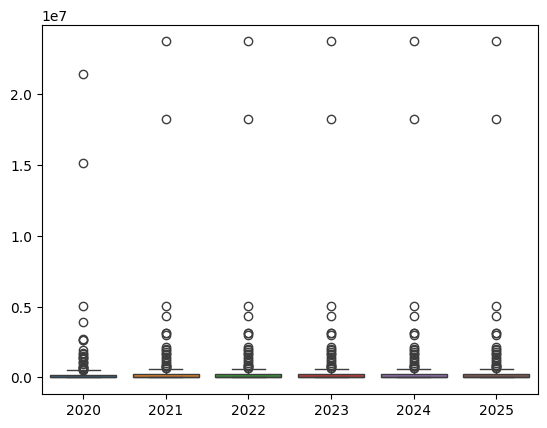

In [7]:
import seaborn as sns
sns.boxplot(data=df[['2020', '2021', '2022', '2023', '2024', '2025']])
plt.show()

In [8]:
region_map = {
    # Africa
    'Algeria': 'Africa', 'Angola': 'Africa', 'Benin': 'Africa', 'Botswana': 'Africa', 'Burkina Faso': 'Africa',
    'Burundi': 'Africa', 'Cape Verde': 'Africa', 'Cameroon': 'Africa', 'Central African Republic': 'Africa',
    'Chad': 'Africa', 'Comoros': 'Africa', 'Republic of the Congo': 'Africa', 'Democratic Republic of the Congo': 'Africa',
    'Djibouti': 'Africa', 'Egypt': 'Africa', 'Equatorial Guinea': 'Africa', 'Eritrea': 'Africa', 'Eswatini': 'Africa',
    'Ethiopia': 'Africa', 'Gabon': 'Africa', 'Gambia': 'Africa', 'Ghana': 'Africa', 'Guinea': 'Africa',
    'Guinea-Bissau': 'Africa', 'Ivory Coast': 'Africa', 'Kenya': 'Africa', 'Lesotho': 'Africa', 'Liberia': 'Africa',
    'Libya': 'Africa', 'Madagascar': 'Africa', 'Malawi': 'Africa', 'Mali': 'Africa', 'Mauritania': 'Africa',
    'Mauritius': 'Africa', 'Morocco': 'Africa', 'Mozambique': 'Africa', 'Namibia': 'Africa', 'Niger': 'Africa',
    'Nigeria': 'Africa', 'Rwanda': 'Africa', 'São Tomé and Príncipe': 'Africa', 'Senegal': 'Africa', 'Seychelles': 'Africa',
    'Sierra Leone': 'Africa', 'Somalia': 'Africa', 'South Africa': 'Africa', 'South Sudan': 'Africa', 'Sudan': 'Africa',
    'Tanzania': 'Africa', 'Togo': 'Africa', 'Tunisia': 'Africa', 'Uganda': 'Africa', 'Zambia': 'Africa', 'Zimbabwe': 'Africa',

    # Asia
    'Afghanistan': 'Asia', 'Armenia': 'Asia', 'Azerbaijan': 'Asia', 'Bahrain': 'Asia', 'Bangladesh': 'Asia',
    'Bhutan': 'Asia', 'Brunei': 'Asia', 'Cambodia': 'Asia', 'China': 'Asia', 'Georgia': 'Asia', 'India': 'Asia',
    'Indonesia': 'Asia', 'Iran': 'Asia', 'Iraq': 'Asia', 'Israel': 'Asia', 'Japan': 'Asia', 'Jordan': 'Asia',
    'Kazakhstan': 'Asia', 'Kuwait': 'Asia', 'Kyrgyzstan': 'Asia', 'Laos': 'Asia', 'Lebanon': 'Asia', 'Malaysia': 'Asia',
    'Maldives': 'Asia', 'Mongolia': 'Asia', 'Myanmar': 'Asia', 'Nepal': 'Asia', 'North Korea': 'Asia',
    'Oman': 'Asia', 'Pakistan': 'Asia', 'Palestine': 'Asia', 'Philippines': 'Asia', 'Qatar': 'Asia', 'Saudi Arabia': 'Asia',
    'Singapore': 'Asia', 'South Korea': 'Asia', 'Sri Lanka': 'Asia', 'Syria': 'Asia', 'Taiwan': 'Asia',
    'Tajikistan': 'Asia', 'Thailand': 'Asia', 'Timor-Leste': 'Asia', 'Turkey': 'Asia', 'Turkmenistan': 'Asia',
    'United Arab Emirates': 'Asia', 'Uzbekistan': 'Asia', 'Vietnam': 'Asia', 'Yemen': 'Asia',

    # Europe
    'Albania': 'Europe', 'Andorra': 'Europe', 'Austria': 'Europe', 'Belarus': 'Europe', 'Belgium': 'Europe',
    'Bosnia and Herzegovina': 'Europe', 'Bulgaria': 'Europe', 'Croatia': 'Europe', 'Cyprus': 'Europe',
    'Czech Republic': 'Europe', 'Denmark': 'Europe', 'Estonia': 'Europe', 'Finland': 'Europe', 'France': 'Europe',
    'Germany': 'Europe', 'Greece': 'Europe', 'Hungary': 'Europe', 'Iceland': 'Europe', 'Ireland': 'Europe',
    'Italy': 'Europe', 'Kosovo': 'Europe', 'Latvia': 'Europe', 'Lithuania': 'Europe', 'Luxembourg': 'Europe',
    'Malta': 'Europe', 'Moldova': 'Europe', 'Monaco': 'Europe', 'Montenegro': 'Europe', 'Netherlands': 'Europe',
    'North Macedonia': 'Europe', 'Norway': 'Europe', 'Poland': 'Europe', 'Portugal': 'Europe', 'Romania': 'Europe',
    'Russia': 'Europe'}

In [9]:
df['Region'] = df['Country'].map(region_map)


In [10]:
df['Growth_2020_2025'] = (((df['2025'] - df['2020']) / df['2020']) * 100).round(2)
df

,Country,2020,2021,2022,2023,2024,2025,Region,Growth_2020_2025
0,Afghanistan,20136,14278.0,14278.0,14278.0,14278.0,14278.0,Asia,-29.09
1,Albania,15271,18086.0,18086.0,18086.0,18086.0,18086.0,Europe,18.43
2,Algeria,164774,185850.0,185850.0,185850.0,185850.0,185850.0,Africa,12.79
3,Andorra,2885,3325.0,3325.0,3325.0,3325.0,3325.0,Europe,15.25
4,Angola,66521,84375.0,84375.0,84375.0,84375.0,84375.0,Africa,26.84
...,...,...,...,...,...,...,...,...,...
191,Vietnam,346310,370076.0,370076.0,370076.0,370076.0,370076.0,Asia,6.86
192,Palestine,15532,18109.0,18109.0,18109.0,18109.0,18109.0,Asia,16.59
193,Yemen,20220,19394.0,19394.0,19394.0,19394.0,19394.0,Asia,-4.09
194,Zambia,18138,22096.0,22096.0,22096.0,22096.0,22096.0,Africa,21.82


In [11]:
df['CAGR'] = (((df['2025'] / df['2020']) ** (1/5) - 1) * 100).round(2)
df

,Country,2020,2021,2022,2023,2024,2025,Region,Growth_2020_2025,CAGR
0,Afghanistan,20136,14278.0,14278.0,14278.0,14278.0,14278.0,Asia,-29.09,-6.64
1,Albania,15271,18086.0,18086.0,18086.0,18086.0,18086.0,Europe,18.43,3.44
2,Algeria,164774,185850.0,185850.0,185850.0,185850.0,185850.0,Africa,12.79,2.44
3,Andorra,2885,3325.0,3325.0,3325.0,3325.0,3325.0,Europe,15.25,2.88
4,Angola,66521,84375.0,84375.0,84375.0,84375.0,84375.0,Africa,26.84,4.87
...,...,...,...,...,...,...,...,...,...,...
191,Vietnam,346310,370076.0,370076.0,370076.0,370076.0,370076.0,Asia,6.86,1.34
192,Palestine,15532,18109.0,18109.0,18109.0,18109.0,18109.0,Asia,16.59,3.12
193,Yemen,20220,19394.0,19394.0,19394.0,19394.0,19394.0,Asia,-4.09,-0.83
194,Zambia,18138,22096.0,22096.0,22096.0,22096.0,22096.0,Africa,21.82,4.03


In [12]:
df['Absolute_Growth'] = df['2025'] - df['2020']
df

,Country,2020,2021,2022,2023,2024,2025,Region,Growth_2020_2025,CAGR,Absolute_Growth
0,Afghanistan,20136,14278.0,14278.0,14278.0,14278.0,14278.0,Asia,-29.09,-6.64,-5858.0
1,Albania,15271,18086.0,18086.0,18086.0,18086.0,18086.0,Europe,18.43,3.44,2815.0
2,Algeria,164774,185850.0,185850.0,185850.0,185850.0,185850.0,Africa,12.79,2.44,21076.0
3,Andorra,2885,3325.0,3325.0,3325.0,3325.0,3325.0,Europe,15.25,2.88,440.0
4,Angola,66521,84375.0,84375.0,84375.0,84375.0,84375.0,Africa,26.84,4.87,17854.0
...,...,...,...,...,...,...,...,...,...,...,...
191,Vietnam,346310,370076.0,370076.0,370076.0,370076.0,370076.0,Asia,6.86,1.34,23766.0
192,Palestine,15532,18109.0,18109.0,18109.0,18109.0,18109.0,Asia,16.59,3.12,2577.0
193,Yemen,20220,19394.0,19394.0,19394.0,19394.0,19394.0,Asia,-4.09,-0.83,-826.0
194,Zambia,18138,22096.0,22096.0,22096.0,22096.0,22096.0,Africa,21.82,4.03,3958.0


In [13]:
df['Trend'] = df['Growth_2020_2025'].apply(lambda x: 'Growing' if x > 0 else 'Declining')
df

,Country,2020,2021,2022,2023,2024,2025,Region,Growth_2020_2025,CAGR,Absolute_Growth,Trend
0,Afghanistan,20136,14278.0,14278.0,14278.0,14278.0,14278.0,Asia,-29.09,-6.64,-5858.0,Declining
1,Albania,15271,18086.0,18086.0,18086.0,18086.0,18086.0,Europe,18.43,3.44,2815.0,Growing
2,Algeria,164774,185850.0,185850.0,185850.0,185850.0,185850.0,Africa,12.79,2.44,21076.0,Growing
3,Andorra,2885,3325.0,3325.0,3325.0,3325.0,3325.0,Europe,15.25,2.88,440.0,Growing
4,Angola,66521,84375.0,84375.0,84375.0,84375.0,84375.0,Africa,26.84,4.87,17854.0,Growing
...,...,...,...,...,...,...,...,...,...,...,...,...
191,Vietnam,346310,370076.0,370076.0,370076.0,370076.0,370076.0,Asia,6.86,1.34,23766.0,Growing
192,Palestine,15532,18109.0,18109.0,18109.0,18109.0,18109.0,Asia,16.59,3.12,2577.0,Growing
193,Yemen,20220,19394.0,19394.0,19394.0,19394.0,19394.0,Asia,-4.09,-0.83,-826.0,Declining
194,Zambia,18138,22096.0,22096.0,22096.0,22096.0,22096.0,Africa,21.82,4.03,3958.0,Growing


In [14]:
Years = ['2020','2021','2022','2023','2024','2025']
df['Avg_GDP'] = df[Years].mean(axis=1).round(2)
df['Max_GDP_Year'] = df[Years].idxmax(axis=1)
df['Min_GDP_Year'] = df[Years].idxmin(axis=1)
df

,Country,2020,2021,2022,2023,2024,2025,Region,Growth_2020_2025,CAGR,Absolute_Growth,Trend,Avg_GDP,Max_GDP_Year,Min_GDP_Year
0,Afghanistan,20136,14278.0,14278.0,14278.0,14278.0,14278.0,Asia,-29.09,-6.64,-5858.0,Declining,15254.33,2020,2021
1,Albania,15271,18086.0,18086.0,18086.0,18086.0,18086.0,Europe,18.43,3.44,2815.0,Growing,17616.83,2021,2020
2,Algeria,164774,185850.0,185850.0,185850.0,185850.0,185850.0,Africa,12.79,2.44,21076.0,Growing,182337.33,2021,2020
3,Andorra,2885,3325.0,3325.0,3325.0,3325.0,3325.0,Europe,15.25,2.88,440.0,Growing,3251.67,2021,2020
4,Angola,66521,84375.0,84375.0,84375.0,84375.0,84375.0,Africa,26.84,4.87,17854.0,Growing,81399.33,2021,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,Vietnam,346310,370076.0,370076.0,370076.0,370076.0,370076.0,Asia,6.86,1.34,23766.0,Growing,366115.00,2021,2020
192,Palestine,15532,18109.0,18109.0,18109.0,18109.0,18109.0,Asia,16.59,3.12,2577.0,Growing,17679.50,2021,2020
193,Yemen,20220,19394.0,19394.0,19394.0,19394.0,19394.0,Asia,-4.09,-0.83,-826.0,Declining,19531.67,2020,2021
194,Zambia,18138,22096.0,22096.0,22096.0,22096.0,22096.0,Africa,21.82,4.03,3958.0,Growing,21436.33,2021,2020


# Largest Absolute GDP Gain

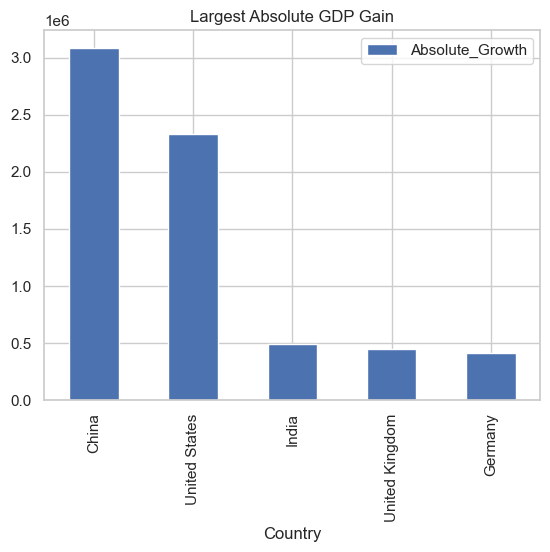

In [39]:
df.sort_values('Absolute_Growth', ascending=False)\
 .head(5)\
 .plot.bar(x='Country', y='Absolute_Growth', title='Largest Absolute GDP Gain')
plt.show()


**China and the United States** dominate the absolute GDP growth between 2020 and 2025,  
  with gains far exceeding any other economy.  
* India shows a **strong upward trajectory**, ranking third despite a much smaller base,  
  signalling rapid economic expansion.
* The United Kingdom and Germany record positive growth but remain far behind the top two leaders.  

# Highest Average GDP (2020–2025)

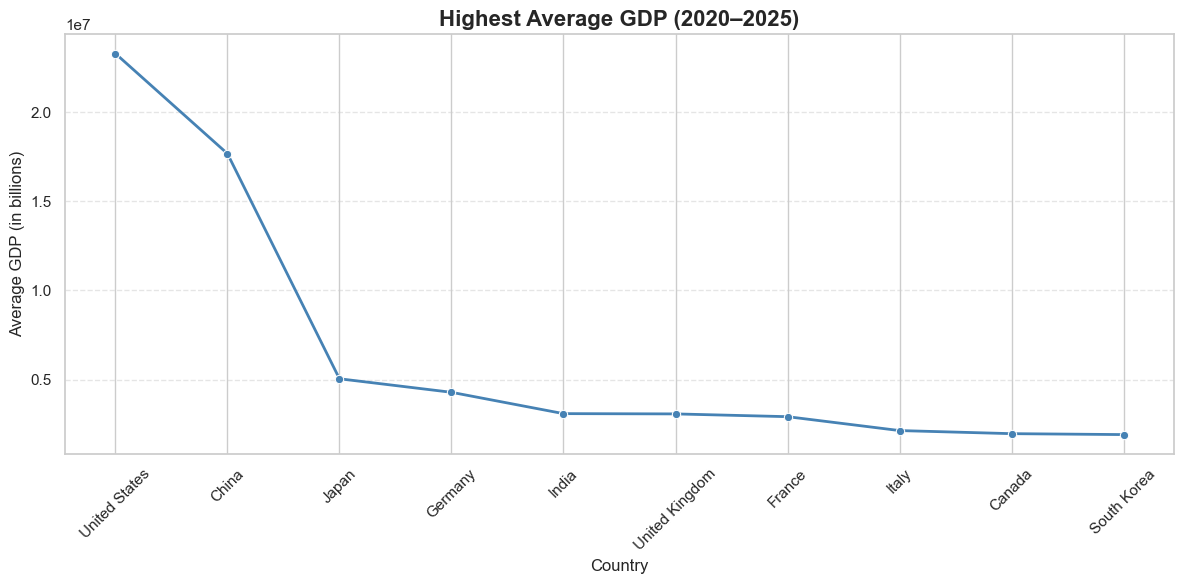

In [16]:
df_top_avg = df.sort_values('Avg_GDP', ascending=False).head(10)
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_top_avg,         
    x='Country',
    y='Avg_GDP',
    marker='o',
    linewidth=2,
    color='steelblue'
)
plt.title('Highest Average GDP (2020–2025)', fontsize=16, fontweight='bold')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Average GDP (in billions)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

* **United States** clearly leads with the highest average GDP, staying well ahead of all other economies.  
* **China** holds the second position, but with a noticeable gap compared to the U.S.  
* The next group—**Japan, Germany, and India**—form a mid-tier cluster, showing strong but comparatively smaller economies.  
* Remaining countries such as the United Kingdom, France, Italy, Canada, and South Korea  
  maintain stable GDP levels but contribute far less to the global total.
* The steep decline after the first two countries highlights a **highly concentrated share of global GDP**.

# Share of World GDP (2025)

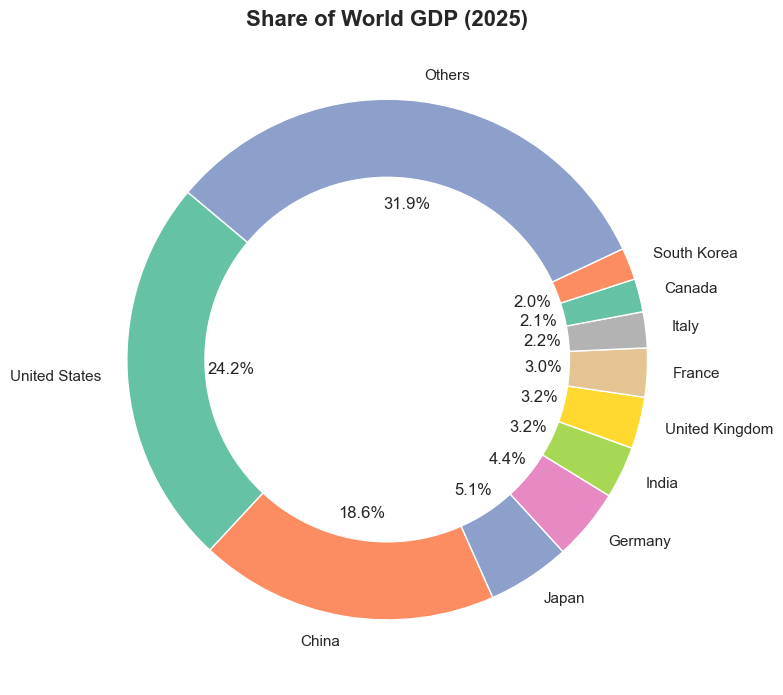

In [27]:
top10 = df.sort_values('2025', ascending=False).head(10)
others = df['2025'].sum() - top10['2025'].sum()

labels = list(top10['Country']) + ['Others']
sizes  = list(top10['2025']) + [others]

plt.figure(figsize=(8,8))
wedges, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('Set2', n_colors=len(labels))
)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Share of World GDP (2025)', fontsize=16, weight='bold')
plt.tight_layout()
plt.show()


* **United States** alone accounts for **about one-quarter (≈24 %)** of the world’s GDP.  
* **China** contributes **nearly 19 %**, keeping the global economy heavily dependent on these two nations.  
* **Japan and Germany** are the only other countries with a share above **4 %**,  
  while all remaining top-10 economies individually stay below that mark.  
* The **“Others” category still represents ~32 %**, showing that a significant portion of global output
  comes from the combined effort of many mid-sized economies.
* This highlights a **high concentration of economic power** in a few leading countries,
  yet underscores the importance of collective growth from the rest of the world.

# Distribution Of Economic Trends

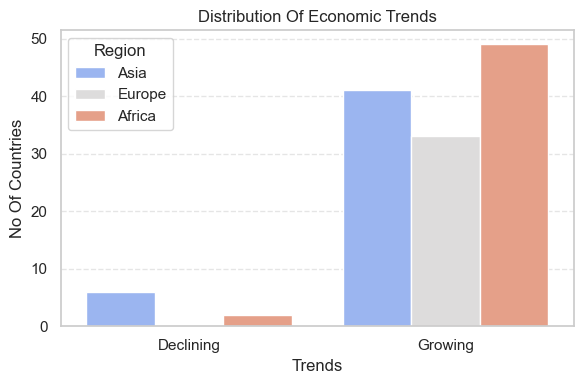

In [19]:
plt.figure(figsize=(6,4))
sns.countplot(x='Trend',data=df,palette='coolwarm',hue='Region')
plt.title("Distribution Of Economic Trends")
plt.xlabel('Trends')
plt.ylabel('No Of Countries')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

* **Growth dominates:** Most countries are in the **Growing** category, with counts far exceeding Declining.
* **Regional pattern:**  
  * **Africa** shows the highest number of growing economies, close to 50.  
  * **Asia** follows with about 40 growing countries.  
  * **Europe** has slightly fewer growing nations (around 30) compared with Asia and Africa.  
* **Minimal decline:** Only a handful of countries across all three regions are classified as Declining,
  indicating a broad positive economic outlook worldwide.

# GDP Heatmap (Top 20 Countries)

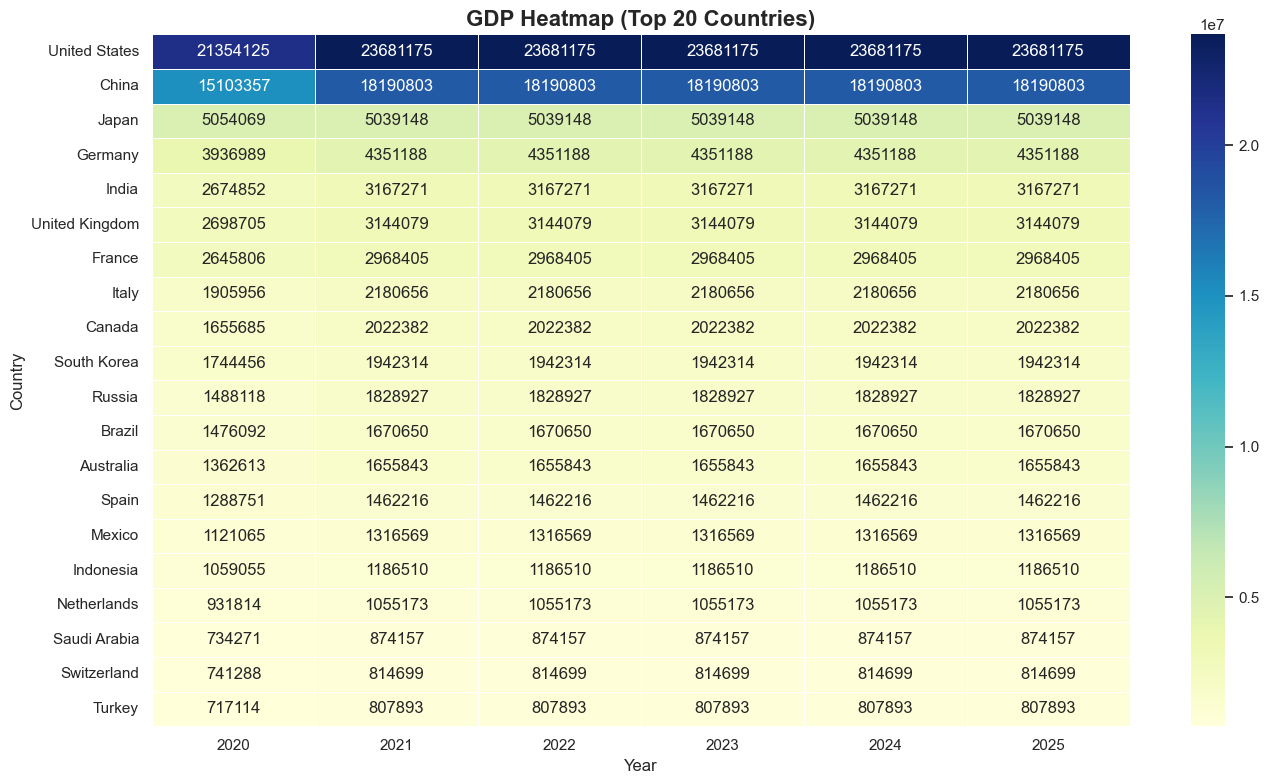

In [20]:
heat_df = df.sort_values('Avg_GDP', ascending=False).head(20)
heat_df = heat_df.set_index('Country')[['2020','2021','2022','2023','2024','2025']]

plt.figure(figsize=(14,8))
sns.heatmap(heat_df, annot=True, fmt='.0f', cmap='YlGnBu', linewidths=0.5)
plt.title('GDP Heatmap (Top 20 Countries)', fontsize=16, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


**United States** remains dominant with GDP consistently above **21–23 million**, the darkest shade on the map.  
**China** holds the second spot, showing strong and sustained growth.  
**Japan, Germany, and India** form the **mid-tier group**, significantly below China but ahead of other nations.  
**European economies** (France, UK, Italy, Spain, etc.) show **stable but modest growth** compared to the top two.  
**Emerging markets** like **Brazil, Indonesia, and Turkey** appear lighter, indicating **lower GDP levels** but steady improvement.  

**Conclusion:** The global GDP is highly concentrated — with the **U.S. and China together far outpacing the rest of the world**, while mid-tier and emerging economies grow at a slower pace.

# Max_Vs_Min_GDP_Year

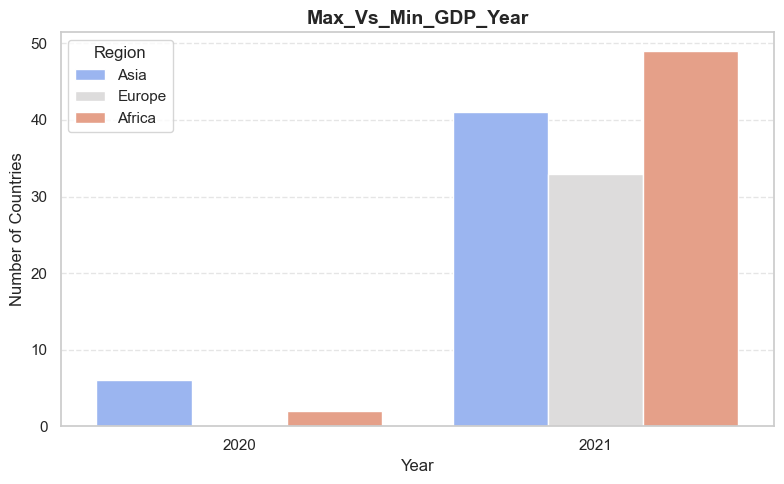

In [21]:
plt.figure(figsize=(8,5))
sns.countplot(x='Max_GDP_Year', data=df, palette='coolwarm',hue='Region')
plt.title('Max_Vs_Min_GDP_Year', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Number of Countries')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


- **North America** shows the highest GDP values consistently, indicating strong economic dominance.
- **Europe** maintains moderate growth, reflecting stability and resilience.
- **Africa** demonstrates steady improvement, highlighting emerging economic momentum.

- This visualization helps identify regional disparities in economic scale and growth, offering insights into global development patterns and potential investment opportunities.

**Executive Summary**

- This project examines GDP trends of major economies from 2020 to 2025 to understand global growth patterns.  
- It highlights top countries by total and average GDP, identifies emerging markets, and compares regional performance.  
- Using Python, Pandas, Matplotlib, and Seaborn, the analysis provides clear visual insights into economic shifts.  
- The goal is to reveal key drivers of the world economy and track how their contributions change over time.